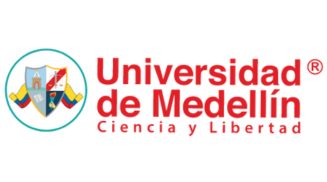
*ESPECIALIZACIÓN EN CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL*

Estudiantes:
Jonatan Andres Londoño Taborda - Felipe Londoño Mendoza

01 abril 2025


---

## Compresión de los datos

Este conjunto de datos analiza diversos índices de costo de vida relativos a la ciudad de Nueva York (NYC), la cual tiene un índice base del 100%.

A continuación, se presenta una descripción de cada índice y su significado:

- **Índice del Costo de Vida excluyendo alquiler (Cost of Living Index):** Este índice indica los precios relativos de bienes de consumo como alimentos, restaurantes, transporte y servicios públicos, excluyendo los gastos de alojamiento como el alquiler o la hipoteca. Por ejemplo, una ciudad con un índice de costo de vida de 120 se estima que es un 20% más cara que la ciudad de Nueva York (excluyendo el alquiler).

- **Índice de Alquiler (Rent Index):** Este índice estima los precios de alquiler de apartamentos en una ciudad en comparación con la ciudad de Nueva York. Si el índice de alquiler es 80, sugiere que los precios promedio de alquiler en esa ciudad son aproximadamente un 20% más bajos que en Nueva York.

- **Índice de Costo de Vida más Alquiler (Cost of Living Plus Rent Index):** Este índice estima el costo de bienes de consumo incluyendo el alquiler, en comparación con la ciudad de Nueva York.

- **Índice de Alimentos (Groceries Index):** Este índice proporciona una estimación de los precios de productos de supermercado en una ciudad con respecto a Nueva York. Numbeo utiliza pesos de productos del apartado “Mercados” para calcular este índice en cada ciudad.

- **Índice de Restaurantes (Restaurant Price Index):** Este índice compara los precios de comidas y bebidas en restaurantes y bares con los de la ciudad de Nueva York.

- **Poder Adquisitivo Local (Local Purchasing Power Index):** Este índice indica el poder adquisitivo relativo en una ciudad determinada, basado en el salario neto promedio. Un poder adquisitivo doméstico de 40 significa que los residentes con un salario promedio pueden adquirir, en promedio, un 60% menos de bienes y servicios en comparación con los residentes de la ciudad de Nueva York con un salario promedio.


In [20]:
# Cargar librerías necesarias para análisis de datos, visualización y modelado estadístico
import numpy as np                                  # Operaciones numéricas y vectores
import pandas as pd                                 # Manipulación de estructuras de datos (DataFrames)
import matplotlib.pyplot as plt                     # Visualización básica (gráficos)
%matplotlib inline
import seaborn as sns                               # Visualización avanzada y estilizada
from sklearn.preprocessing import StandardScaler    # Escala variables a media 0 y desviación estándar 1
import scipy.stats as st                            # Funciones estadísticas y tests de hipótesis
import statsmodels.api as sm                        # Modelado estadístico (regresión lineal, etc.)
import statsmodels.stats.api as sms                 # Pruebas estadísticas y validación de supuestos
from statsmodels.graphics.tsaplots import plot_acf  # Análisis de autocorrelación (si se extiende al análisis temporal)

In [21]:
# Definir el nombre del archivo CSV que contiene los datos de índices de costo de vida por país
Ruta = "Cost_of_Living_Index_by_Country_2024_with_continent.csv"

# Leer el archivo con pandas
datos = pd.read_csv(Ruta,sep=',')
datos.head()

,Rank,Country,Continent,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,Europe,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,North America,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,Europe,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,Asia,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,North America,76.6,19.0,48.9,80.8,69.4,43.5


In [22]:
# Revisión general de la estructura del DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Continent                       121 non-null    object 
 3   Cost of Living Index            121 non-null    float64
 4   Rent Index                      121 non-null    float64
 5   Cost of Living Plus Rent Index  121 non-null    float64
 6   Groceries Index                 121 non-null    float64
 7   Restaurant Price Index          121 non-null    float64
 8   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 8.6+ KB


In [23]:
# Resumen estadístico de las variables numéricas del conjunto de datos
datos.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


<Axes: >

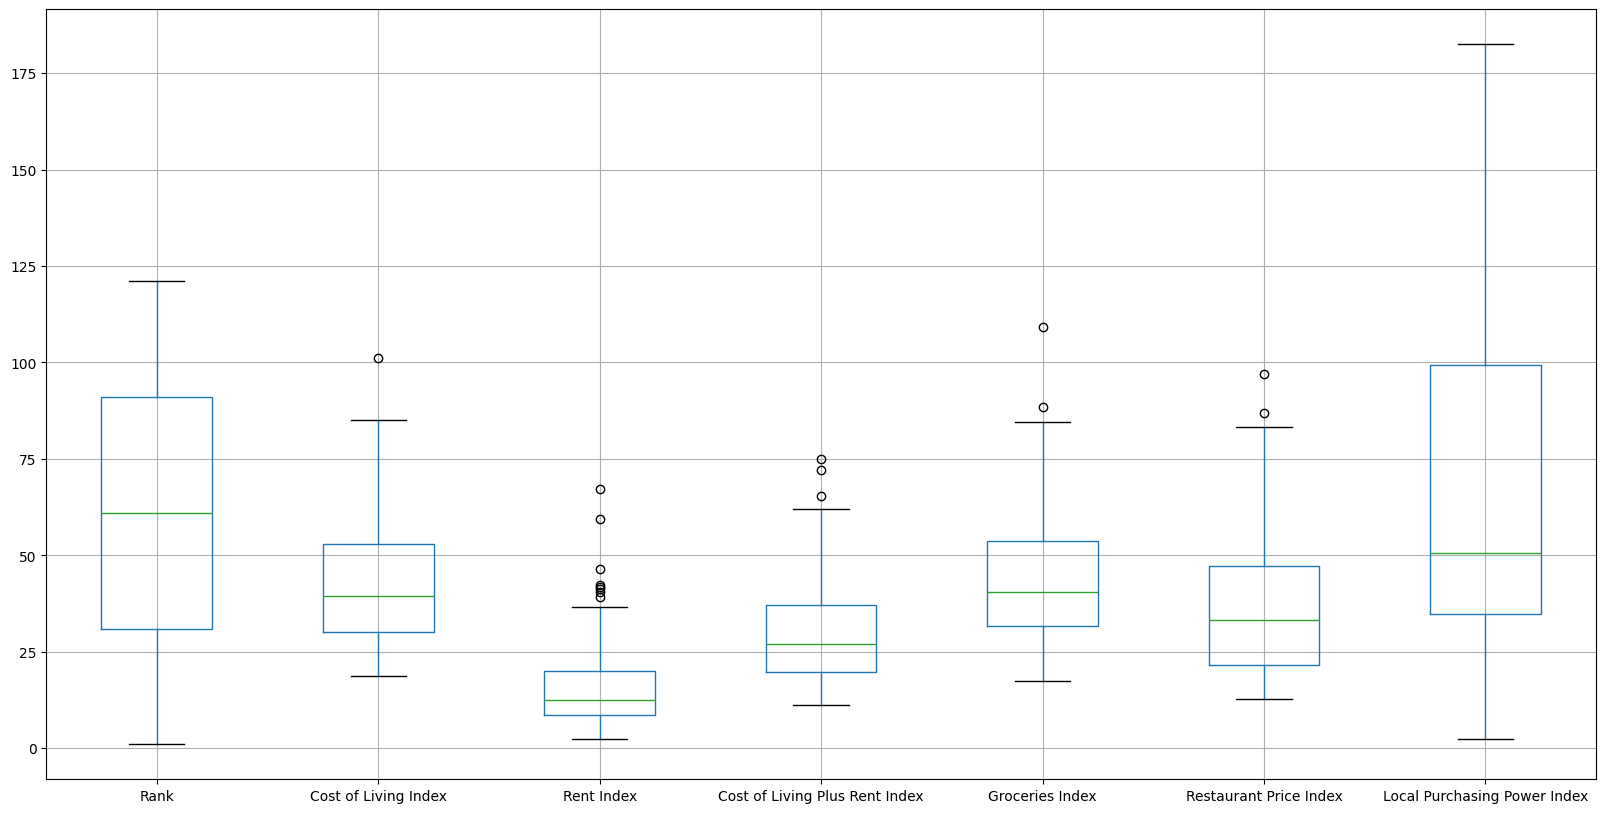

In [24]:
# Visualización de boxplots para todas las variables numéricas
# Esto permite observar la escala de los datos, su dispersión y posibles valores atípicos
datos.boxplot(figsize=(20, 10))  # Ajusta el tamaño del gráfico para mejor legibilidad

La escala de amplitud de los datos es amplia. Dado que la mayoria de las variables tienen escalas desproporcianadas es posible que se deba escalar los datos.

In [25]:
# Selección de variables continuas del conjunto de datos
# Estas variables están relacionadas con los costos de vida en diferentes aspectos economicos que se prestan para modelar con regresión lineal
continuas=datos[["Cost of Living Index",
                 "Rent Index",
                 "Cost of Living Plus Rent Index",
                 "Groceries Index",
                 "Restaurant Price Index",
                 "Local Purchasing Power Index"]]
# Cálculo de la matriz de correlación de Pearson entre las variables seleccionadas
# Esto permite identificar relaciones lineales fuertes entre pares de variables
correlation_matrix=continuas.corr()

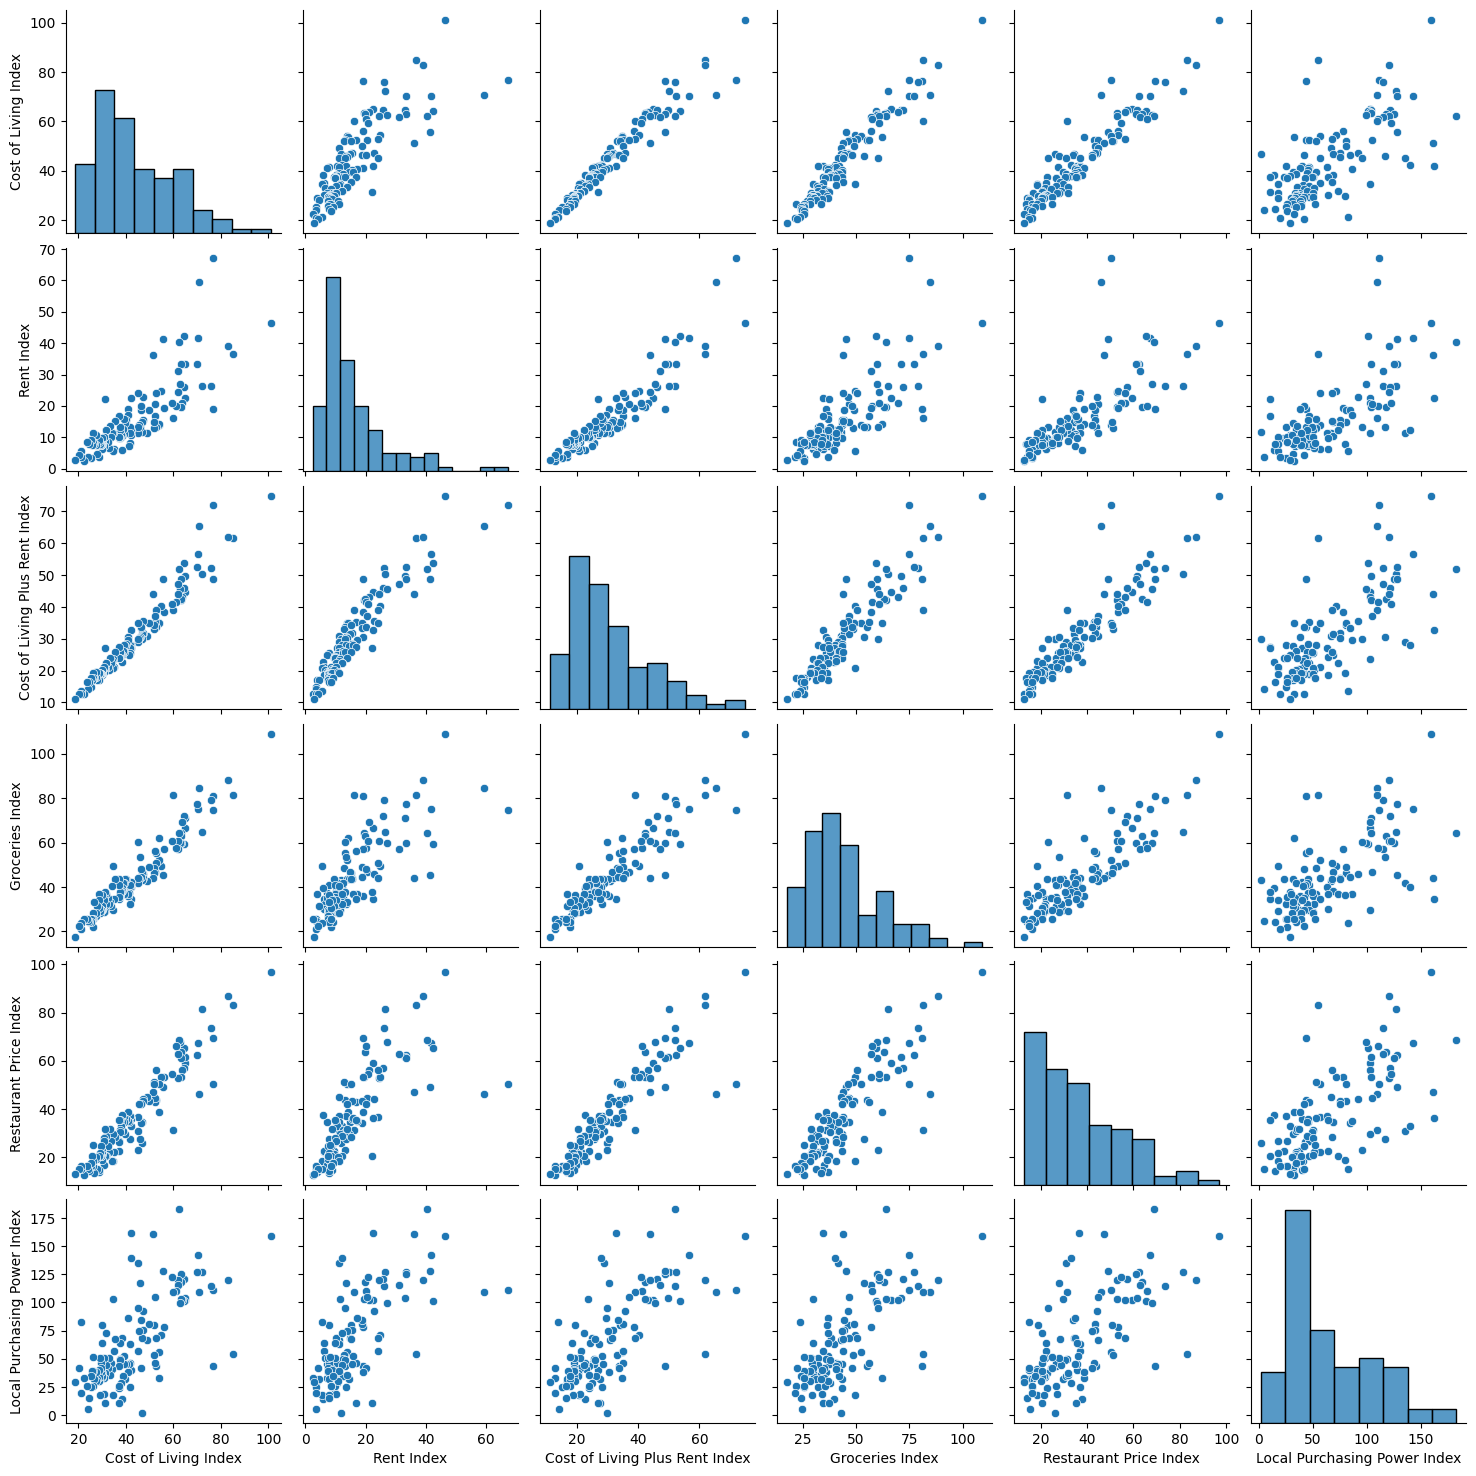

In [26]:
# Visualización conjunta de la distribución y relaciones entre variables continuas
# Este gráfico muestra histogramas en la diagonal y scatter plots para cada par de variables
sns.pairplot(continuas) # Des

Axes(0.125,0.11;0.62x0.77)


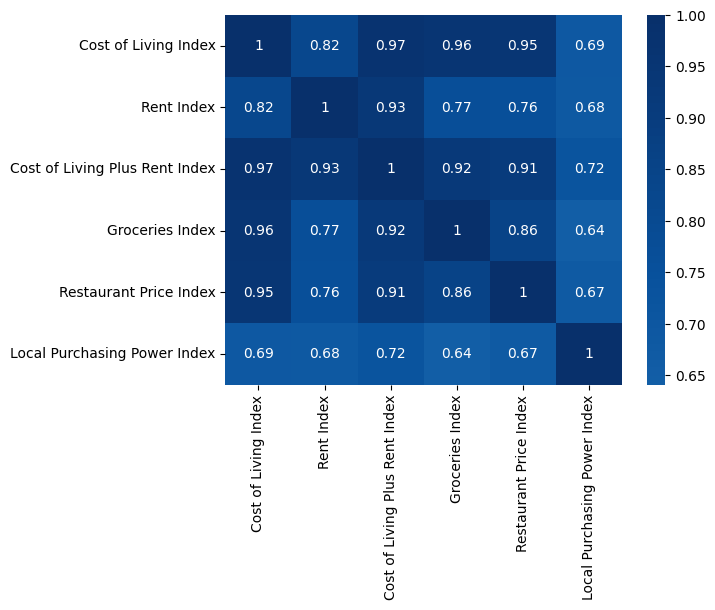

In [27]:
# Visualización de la matriz de correlación entre variables continuas
# El mapa de calor permite identificar rápida y visualmente la fuerza y dirección de las relaciones lineales
print(sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0))#adicionar descripción

<Axes: xlabel='Cost of Living Index', ylabel='Continent'>

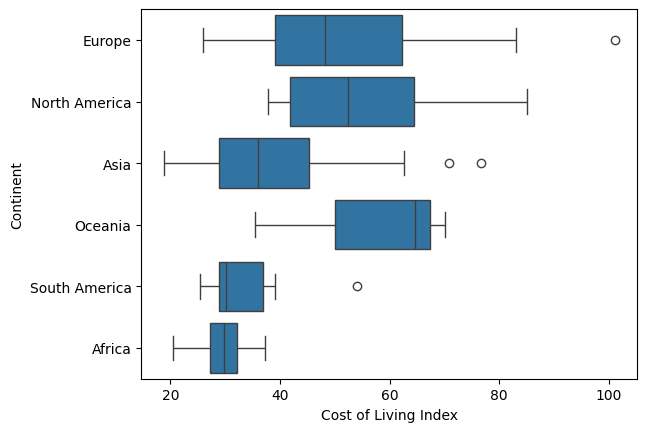

In [28]:
# 'BOX PLOT' Diagrama de caja y bigotes por continente y el inidice de costo de vida excluyendo el alquiler
sns.boxplot(x = 'Cost of Living Index', y = 'Continent', data = datos)

# *Objetivo del análisis*

Evaluar si el Restaurant Price Index predice significativamente el Cost of Living Plus Rent Index, es decir, si los precios en restaurantes se asocian linealmente con el costo de vida total incluyendo el arriendo.

### Modelo estadístico propuesto

$$
\text{Cost of Living Plus Rent Index}_i = \beta_0 + \beta_1 \cdot \text{Restaurant Price Index}_i + \varepsilon_i
$$

In [29]:
# 🎯 Definir variables
variableDependiente = 'Cost of Living Plus Rent Index'
variableIndependiente = 'Restaurant Price Index'

Text(0.5, 1.0, 'Distribución del Restaurant Price Index')

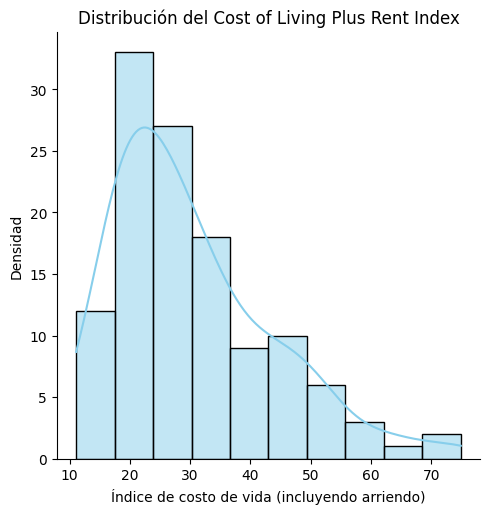

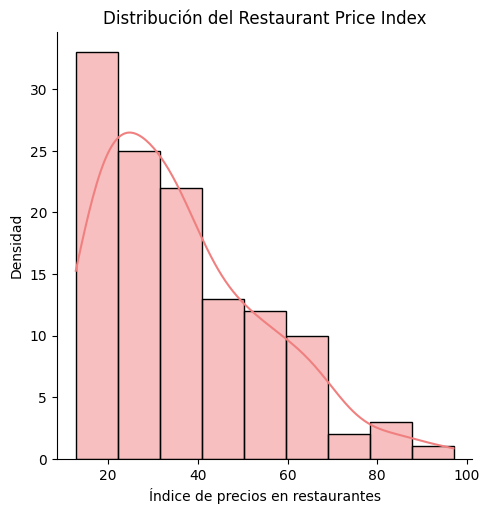

In [31]:
# Histograma + KDE del índice de costo de vida total (variable dependiente)
sns.displot(datos[variableDependiente], color='skyblue', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Índice de costo de vida (incluyendo arriendo)')
plt.ylabel('Densidad')
plt.title('Distribución del Cost of Living Plus Rent Index')

# Histograma + KDE del índice de precios en restaurantes (variable independiente)
sns.displot(datos[variableIndependiente], color='lightcoral', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Índice de precios en restaurantes')
plt.ylabel('Densidad')
plt.title('Distribución del Restaurant Price Index')

**Conclusiones estadísticas**

1. Ambas variables presentan una distribución asimétrica positiva (sesgo a la derecha):

    La mayoría de los países tiene índices bajos o moderados, tanto en el costo de vida total como en los precios de restaurantes.

    Existen colas largas hacia la derecha, lo que sugiere la presencia de países con niveles muy altos en ambas métricas, aunque son pocos.

2. Parece que los datos no se ajustan a una distribución normal:

    La curva KDE de ambas variables muestra asimetría pronunciada.

    Esto sugiere que, aunque se puede aplicar regresión lineal, se deben verificar cuidadosamente los residuos del modelo (normalidad y homocedasticidad).

3. Presencia de posibles valores atípicos en el rango alto:

    En ambas distribuciones se identifican observaciones fuera del rango típico que podrían influir significativamente en el ajuste del modelo.

    Se recomienda realizar análisis de outliers o, si es necesario, modelos robustos.

4. Rangos compatibles para regresión:

    Ambas variables están en escalas comparables y siguen una tendencia creciente esperada (mayor precio en restaurantes asociado a mayor costo de vida total).

    Este comportamiento refuerza la viabilidad de evaluar una relación lineal entre ambas variables.


 Índice de costo de vida (incluyendo arriendo)


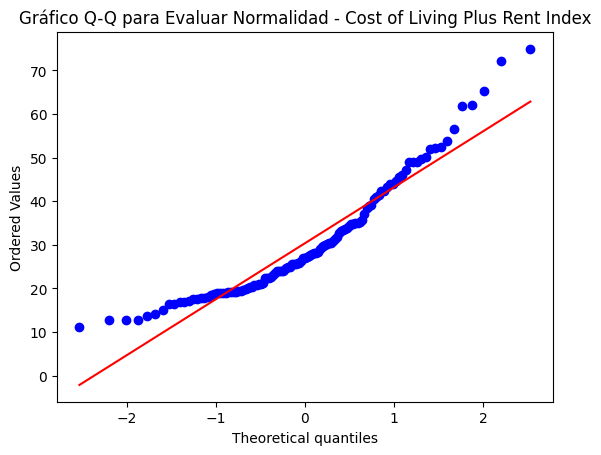


 Índice de precios en restaurantes


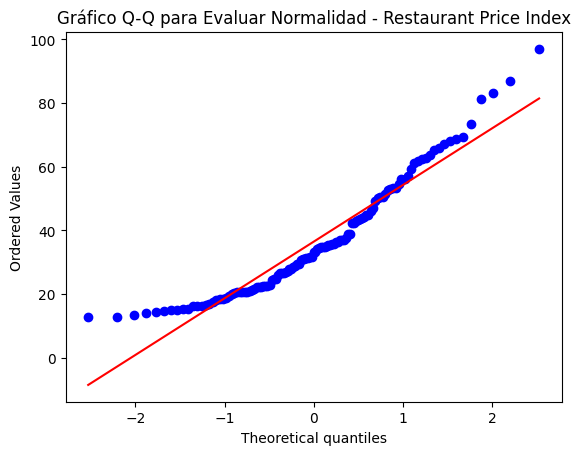

In [34]:
# Q-Q Plot para la variable dependiente (Y)
st.probplot(datos[variableDependiente], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad - Cost of Living Plus Rent Index")
print('\n', 'Índice de costo de vida (incluyendo arriendo)')
plt.show()

# Q-Q Plot para la variable independiente (X)
st.probplot(datos[variableIndependiente], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Evaluar Normalidad - Restaurant Price Index")
print('\n', 'Índice de precios en restaurantes')
plt.show()

Tanto el Cost of Living Plus Rent Index (variable dependiente) como el Restaurant Price Index (variable independiente) presentan distribuciones asimétricas hacia la derecha, con evidencia de colas largas y valores extremos elevados, como se observa en los histogramas y gráficos Q-Q.

Aunque ninguna de las dos variables sigue estrictamente una distribución normal, su comportamiento central se aproxima razonablemente a la normalidad. Dado que la regresión lineal no exige normalidad en las variables X ni Y, estas condiciones no impiden ajustar el modelo.

Sin embargo, se recomienda evaluar la normalidad de los residuos tras el ajuste, ya que este sí es un supuesto fundamental para garantizar la validez de la inferencia estadística.

In [35]:
# Función definida para aplicar prueba de Shapiro Wilk
def prueba_shapiro_wilk(serie1, serie2):
    """
    Aplica la prueba de Shapiro-Wilk a dos variables y muestra resultados detallados.
    Permite verificar si las distribuciones son normales según hipótesis estadísticas.

    Parámetros:
    - serie1: pd.Series (Variable 1 a evaluar)
    - serie2: pd.Series (Variable 2 a evaluar)
    """
    alfa = 0.05  # Nivel de significancia

    # Prueba para la primera variable
    estadistico1, valor_p1 = st.shapiro(serie1)
    print(f"\n Variable: {serie1.name}")
    print(f"Estadístico de prueba: {estadistico1:.4f}")
    print(f"Valor p: {valor_p1:.4f}")
    print(f"Nivel de significancia: {alfa:.2f}")
    print(f"H₀: [{serie1.name}] sigue una distribución normal.")
    print(f"H₁: [{serie1.name}] no sigue una distribución normal.")
    if valor_p1 > alfa:
        print("No se rechaza H₀: los datos siguen una distribución normal.\n")
    else:
        print("Se rechaza H₀: los datos no siguen una distribución normal.\n")

    # Prueba para la segunda variable
    estadistico2, valor_p2 = st.shapiro(serie2)
    print(f"\n Variable: {serie2.name}")
    print(f"Estadístico de prueba: {estadistico2:.4f}")
    print(f"Valor p: {valor_p2:.4f}")
    print(f"Nivel de significancia: {alfa:.2f}")
    print(f"H₀: [{serie2.name}] sigue una distribución normal.")
    print(f"H₁: [{serie2.name}] no sigue una distribución normal.")
    if valor_p2 > alfa:
        print("No se rechaza H₀: los datos siguen una distribución normal.")
    else:
        print("Se rechaza H₀: los datos no siguen una distribución normal.")

In [ ]:
# Aplicación de la prueba de Shapiro-Wilk a las dos variables del modelo
# Esta prueba nos permite contrastar la hipótesis de que los datos provienen de una distribución normal.
# Se usa un nivel de significancia del 5% (alfa = 0.05).
prueba_shapiro_wilk(
    datos[variableDependiente],     # Y: Índice de costo de vida incluyendo arriendo
    datos[variableIndependiente]    # X: Índice de precios en restaurantes
)

Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9115
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable [Cost of Living Plus Rent Index] sigue una distribución normal.
H_1: La variable [Cost of Living Plus Rent Index] no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal. 

Variable: Restaurant Price Index
Estadístico de prueba: 0.9215
Valor p: 0.0000
Nivel de significancia: 0.05
H_0: La variable [Restaurant Price Index] sigue una distribución normal.
H_1: La variable [Restaurant Price Index] no sigue una distribución normal.
Se rechaza la hipótesis nula: Los datos no siguen una distribución normal.


Ambas variables presentan desviaciones significativas respecto a la normalidad, de acuerdo con la prueba de Shapiro-Wilk (p < 0.05). Dando los siguiente procedemos a estandarizar nuestras variables

In [36]:
# Diccionario para asignar nombres a las columnas estandarizadas
labels = {0: "Rank",
          1: "Cost of Living Index",
          2: "Rent Index",
          3: "Cost of Living Plus Rent Index",
          4: "Groceries Index",
          5: "Restaurant Price Index",
          6: "Local Purchasing Power Index"}
# Paso 1: Aplicar estandarización Z-score
# Objetivo: estandarizar las variables numéricas (media = 0, desviación estándar = 1)
# debido a que no cumplen con el supuesto de normalidad

# Paso 1: Seleccionar solo las columnas numéricas del DataFrame original
variables_numericas = datos.select_dtypes(include='number')

# Paso 2: Aplicar estandarización Z-score
escala = StandardScaler()
datos_escalados = escala.fit_transform(variables_numericas)

# Paso 3: Crear nuevo DataFrame con los datos estandarizados
datos_estandarizados = pd.DataFrame(datos_escalados)

# Paso 4: Renombrar las columnas usando el diccionario 'labels'
datos_estandarizados.rename(columns=labels, inplace=True)

# Paso 5: Visualizar el resultado
datos_estandarizados.head()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,-1.717795,3.578488,2.679021,3.372158,3.819431,3.328965,2.375465
1,-1.689165,2.577288,1.816726,2.380394,2.200306,2.575493,-0.266315
2,-1.660535,2.452916,2.036699,2.395536,2.600672,2.767986,1.400976
3,-1.631905,2.061142,4.500401,3.160178,1.788166,0.766062,1.167504
4,-1.603275,2.054923,0.259314,1.403773,2.153205,1.811022,-0.548004


In [38]:
# Resumen estadístico de las variables estandarizadas
# Confirma que todas las variables tengan media ≈ 0 y desviación estándar ≈ 1
# Esto valida que la estandarización se aplicó correctamente
datos_estandarizados.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,3.303143e-17,1.413011e-16,1.651571e-16,2.018587e-16,-1.045995e-16,2.697567e-16,-1.578168e-16
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-1.717795e+00,-1.539445e+00,-1.201309e+00,-1.457956e+00,-1.573726e+00,-1.301860e+00,-1.593550e+00
25%,-8.588975e-01,-8.305213e-01,-6.645741e-01,-7.993044e-01,-7.435565e-01,-8.178781e-01,-7.687863e-01
50%,0.000000e+00,-2.521886e-01,-3.214157e-01,-2.542132e-01,-2.195489e-01,-1.854021e-01,-3.678245e-01
75%,8.588975e-01,5.748893e-01,3.561024e-01,5.028579e-01,5.576309e-01,5.900686e-01,8.705893e-01
max,1.717795e+00,3.578488e+00,4.500401e+00,3.372158e+00,3.819431e+00,3.328965e+00,2.979446e+00


Text(0.5, 1.0, 'Distribución del Restaurant Price Index')

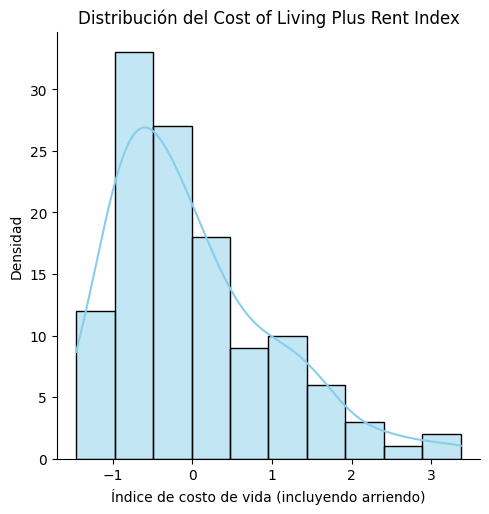

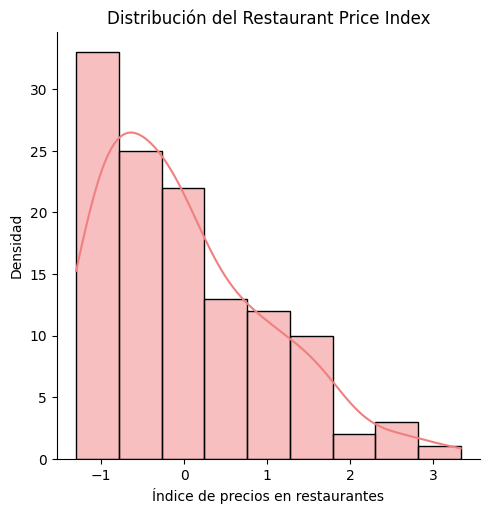

In [41]:
# Visualización de la distribución de las variables estandarizadas
# Esta visualización permite comparar la forma de la distribución después de aplicar Z-score (media = 0, std = 1)

# Variable dependiente: Cost of Living Plus Rent Index(Estandarizada)
sns.displot(datos_estandarizados[variableDependiente], color='skyblue', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Índice de costo de vida (incluyendo arriendo)')
plt.ylabel('Densidad')
plt.title('Distribución del Cost of Living Plus Rent Index')

# Variable independiente: Restaurant Price Index(Estandarizada)
sns.displot(datos_estandarizados[variableIndependiente], color='lightcoral', kde=True) # Se puede remover el argumento 'bins'
plt.xlabel('Índice de precios en restaurantes')
plt.ylabel('Densidad')
plt.title('Distribución del Restaurant Price Index')

In [42]:
# Aplicación de la prueba de Shapiro-Wilk a las variables estandarizadas del modelo
# Esta prueba estadística permite evaluar la hipótesis de normalidad de las variables transformadas mediante Z-score

# H₀: La variable sigue una distribución normal.
# H₁: La variable no sigue una distribución normal.
# Nivel de significancia: 5% (alfa = 0.05)
prueba_shapiro_wilk(datos_estandarizados[variableDependiente],datos_estandarizados[variableIndependiente])


 Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9115
Valor p: 0.0000
Nivel de significancia: 0.05
H₀: [Cost of Living Plus Rent Index] sigue una distribución normal.
H₁: [Cost of Living Plus Rent Index] no sigue una distribución normal.
Se rechaza H₀: los datos no siguen una distribución normal.


 Variable: Restaurant Price Index
Estadístico de prueba: 0.9215
Valor p: 0.0000
Nivel de significancia: 0.05
H₀: [Restaurant Price Index] sigue una distribución normal.
H₁: [Restaurant Price Index] no sigue una distribución normal.
Se rechaza H₀: los datos no siguen una distribución normal.


A pesar de la estandarización mediante Z-score, la prueba de Shapiro-Wilk indica que ninguna de las dos variables sigue estrictamente una distribución normal (valor p < 0.05).
No obstante, la estandarización redujo la dispersión y mejoró la simetría, lo cual puede mejorar el comportamiento del modelo, incluso si no se cumple la normalidad perfecta.
En regresión lineal, la normalidad de las variables no es un supuesto necesario; lo fundamental es que los residuos del modelo sean normales, lo cual se evaluará al final. A continuación procedemos a utilizar el modelo de transformación Box-Cox

In [43]:
from sklearn.preprocessing import PowerTransformer

# Importante: Box-Cox solo funciona con valores estrictamente positivos (> 0)

# Paso 1: Inicializar transformador de Box-Cox
transformer = PowerTransformer(method='box-cox')

# Paso 2: Seleccionar variables numéricas positivas
# Nota: si alguna columna tiene valores ≤ 0, esta transformación generará error
variables_numericas = datos.select_dtypes(include='number')

# Paso 3: Aplicar transformación Box-Cox
datos_box_cox = pd.DataFrame(transformer.fit_transform(variables_numericas))

# Paso 4: Renombrar columnas con los nombres originales
datos_box_cox.rename(columns=labels, inplace=True)

# Paso 5: Mostrar el resultado
datos_box_cox.head()


,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,-2.082241,2.355095,1.950203,2.204659,2.385183,2.175345,1.900782
1,-2.004402,1.945687,1.594674,1.824333,1.763267,1.884846,-0.079545
2,-1.937380,1.888296,1.693917,1.830868,1.940544,1.963650,1.309122
3,-1.876539,1.695930,2.498437,2.130654,1.559090,0.905870,1.150141
4,-1.819917,1.692723,0.592609,1.337192,1.741127,1.532785,-0.409315


In [45]:
# Resumen estadístico de las variables transformadas con Box-Cox
# Este resumen permite verificar que las variables han sido reescaladas y corregidas en su asimetría.
datos_box_cox.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,1.413011e-16,6.899898e-16,4.404191e-17,7.597229e-16,-3.743562e-15,-1.000118e-15,3.385721e-16
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-2.082241e+00,-2.333507e+00,-2.686017e+00,-2.461560e+00,-2.715187e+00,-1.930287e+00,-2.898948e+00
25%,-7.872872e-01,-8.381581e-01,-6.583881e-01,-8.187895e-01,-7.283753e-01,-8.180267e-01,-7.071500e-01
50%,9.585172e-02,-5.592059e-02,-6.739161e-02,-2.668485e-02,-1.014061e-03,6.210283e-02,-1.930477e-01
75%,8.583474e-01,7.407998e-01,6.790354e-01,7.206571e-01,7.579276e-01,7.757213e-01,9.354951e-01
max,1.551291e+00,2.355095e+00,2.498437e+00,2.204659e+00,2.385183e+00,2.175345e+00,2.223089e+00


In [46]:
# Evaluación de normalidad post-transformación Box-Cox
# Se aplica la prueba de Shapiro-Wilk para verificar si las variables transformadas
# se ajustan a una distribución normal

prueba_shapiro_wilk(
    datos_box_cox[variableDependiente],     # Y: Cost of Living Plus Rent Index (Box-Cox)
    datos_box_cox[variableIndependiente]    # X: Restaurant Price Index (Box-Cox)
)


 Variable: Cost of Living Plus Rent Index
Estadístico de prueba: 0.9885
Valor p: 0.4056
Nivel de significancia: 0.05
H₀: [Cost of Living Plus Rent Index] sigue una distribución normal.
H₁: [Cost of Living Plus Rent Index] no sigue una distribución normal.
No se rechaza H₀: los datos siguen una distribución normal.


 Variable: Restaurant Price Index
Estadístico de prueba: 0.9794
Valor p: 0.0612
Nivel de significancia: 0.05
H₀: [Restaurant Price Index] sigue una distribución normal.
H₁: [Restaurant Price Index] no sigue una distribución normal.
No se rechaza H₀: los datos siguen una distribución normal.


Tras aplicar la transformación de Box-Cox, ambas variables (Cost of Living Plus Rent Index y Restaurant Price Index) cumplen el supuesto de normalidad según la prueba de Shapiro-Wilk (p > 0.05).
Esto mejora significativamente las condiciones para ajustar un modelo de regresión lineal y realizar inferencias estadísticas válidas sobre sus coeficientes.
Se recomienda ahora ajustar el modelo y evaluar los residuos.



# Modelo de regresión lineal (Simple)

### Especificación del modelo

Modelo de regresión lineal simple con variables transformadas mediante Box-Cox:

$$
\text{Cost of Living Plus Rent Index}_{\text{BoxCox}} = \beta_0 + \beta_1 \cdot \text{Restaurant Price Index}_{\text{BoxCox}} + \varepsilon
$$

In [47]:
# Preparación de variables para regresión lineal simple con datos transformados por Box-Cox

# Variable independiente (X) — transformada con Box-Cox
# Se agrega una constante para incluir el intercepto β₀ en el modelo
x = sm.add_constant(datos_box_cox[variableIndependiente])  # X = constante + Restaurant Price Index (BoxCox)

# Variable dependiente (Y) — también transformada con Box-Cox
y = datos_box_cox[variableDependiente]  # Y = Cost of Living Plus Rent Index (BoxCox)

In [49]:
# Construcción del modelo de regresión lineal con variables transformadas por Box-Cox

# 1. Definir el modelo con la variable dependiente (Y) y la independiente (X)
modelo = sm.OLS(y, x)

# 2. Ajustar el modelo (estimación de los parámetros β₀ y β₁)
resultado = modelo.fit()

# 3. Mostrar el resumen estadístico del modelo ajustado
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Cost of Living Plus Rent Index   R-squared:                       0.871
Model:                                        OLS   Adj. R-squared:                  0.870
Method:                             Least Squares   F-statistic:                     804.2
Date:                            Sun, 13 Apr 2025   Prob (F-statistic):           8.94e-55
Time:                                    18:09:25   Log-Likelihood:                -47.741
No. Observations:                             121   AIC:                             99.48
Df Residuals:                                 119   BIC:                             105.1
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.263e-16      0.033    1.9e-14      1.000      -0.065       0.065
Restaurant Price Index     0.9333      0.033     28.359      0.000       0.868       0.998
==============================================================================
Omnibus:                       20.166   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.087
Skew:                           0.836   Prob(JB):                     4.83e-07
Kurtosis:                       4.725   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ecuación estimada del modelo (Box-Cox)

$$
\widehat{\text{Cost of Living Plus Rent Index}}_{\text{BoxCox}} = 6.263e-16 + 0.9333 \cdot \text{Restaurant Price Index}_{\text{BoxCox}} + \varepsilon
$$


Conclusiones del ajuste del modelo
R² = 0.871 → El modelo explica el 87.1% de la variabilidad en el Cost of Living Plus Rent Index.

Por cada incremento de una unidad estandarizada (Box-Cox) en el índice de precios de restaurantes, se espera un aumento de 0.9333 unidades estandarizadas en el índice total de costo de vida (incluyendo arriendo). Este efecto es altamente significativo (p < 0.001).

p-valor del coeficiente = 0.000 → El índice de precios en restaurantes es un predictor estadísticamente significativo.

El modelo de regresión lineal simple construido sobre variables transformadas mediante Box-Cox muestra un excelente poder explicativo (R² = 87.1%), y el coeficiente asociado al Restaurant Price Index es significativo y positivo.
Esto sugiere que a mayor precio en restaurantes, el índice total de costo de vida (incluyendo arriendo) también tiende a ser mayor, incluso después de controlar por posibles asimetrías con la transformación.
El intercepto es no significativo, como es esperable al trabajar con variables transformadas y centradas.

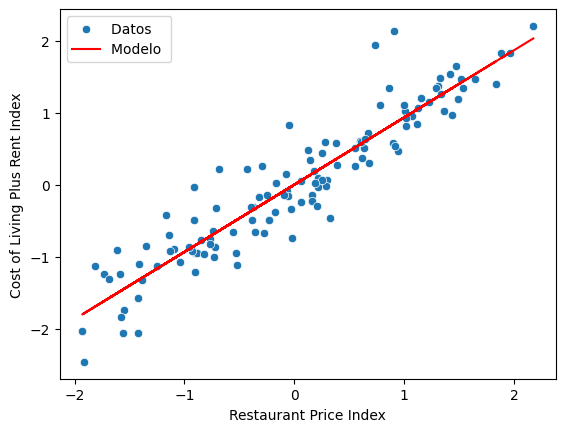

In [50]:
# Visualización del modelo de regresión lineal con variables transformadas (Box-Cox)
# Graficar los datos reales
ax = sns.scatterplot (x=variableIndependiente, y=variableDependiente, data =datos_box_cox, label ='Datos ')
# Etiquetas de los ejes
ax.set(xlabel =variableIndependiente, ylabel =variableDependiente)

# Graficar la línea de regresión ajustada por el modelo
ax.plot(datos_box_cox[variableIndependiente] , resultado . predict(), 'r-', label ='Modelo ')

#  Agregar leyenda
ax.legend()

Los puntos azules representan las observaciones transformadas.

La línea roja representa la recta estimada por el modelo de regresión.

La mayoría de los puntos están cerca de la recta, el ajuste es bueno — lo cual confirma visualmente el R² = 0.87.



In [64]:
# Prueba de hipótesis para verificar el supuesto de linealidad
# H₀: La relación entre X y Y es lineal
# H₁: La relación no es lineal (el modelo no es adecuadamente lineal)
tval , pval = sms.linear_harvey_collier(resultado)
print(f"Valor p de la prueba de Harvey-Collier: {pval}")

Valor p de la prueba de Harvey-Collier: 9.88032819175053e-14


#### Prueba de linealidad (Harvey-Collier)

- **Hipótesis nula (H₀):** la relación entre las variables es **lineal**.
- **Hipótesis alternativa (H₁):** la relación **no es lineal**.

- **Resultado:** valor p = 9.88e-14
- **Conclusión:** Como el valor p < 0.05, **se rechaza la hipótesis nula**.
  
**Existe evidencia estadística suficiente para afirmar que la relación entre las variables no es completamente lineal.**

In [58]:
# Prueba de normalidad de los residuos del modelo ajustado
# H₀: Los residuos siguen una distribución normal
# H₁: Los residuos no siguen una distribución normal

tval, pval = st.shapiro(resultado.resid)
print(f"Valor p de la prueba de Shapiro-Wilk: {pval:.4f}")

Valor p de la prueba de Shapiro-Wilk: 0.0004


####  Prueba de normalidad de los residuos (Shapiro-Wilk)

- **Hipótesis nula (H₀):** Los residuos del modelo siguen una distribución normal.
- **Hipótesis alternativa (H₁):** Los residuos no siguen una distribución normal.
- **Resultado:** valor p = 0.0004

Dado que **p < 0.05**, se **rechaza la hipótesis nula**.  
**Conclusión:** los residuos del modelo **no siguen una distribución normal**, lo cual **viola uno de los supuestos clásicos** de la regresión lineal.

Este resultado sugiere que, aunque el modelo tiene un buen ajuste (R² = 0.87), se debe tener **precaución al interpretar los intervalos de confianza y los p-valores**, ya que la inferencia puede estar sesgada.

Residuos aleatorios

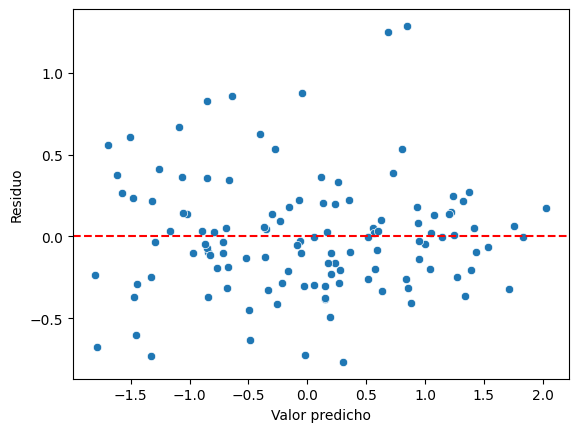

In [59]:
# Gráfico de residuos vs. valores ajustados (predichos)
# Este gráfico permite verificar:
# - Homocedasticidad (residuos con varianza constante)
# - Linealidad (sin patrones en los residuos)
# - Independencia (residuos aleatorios)

# Copiar valores predichos del modelo
pred_val = resultado.fittedvalues.copy()

# Graficar residuos en función de valores predichos
ax = sns.scatterplot (x=pred_val , y=resultado.resid)
ax.set(xlabel ='Valor predicho', ylabel ='Residuo')

# Línea horizontal en y=0 para referencia
ax.axhline(y=0, linestyle ='--', color ='r')

#### Análisis gráfico de residuos vs. valores ajustados

Este gráfico permite validar dos supuestos fundamentales de la regresión lineal:

- **Linealidad**: se espera que los residuos no presenten patrones sistemáticos.
- **Homocedasticidad**: se espera una varianza constante de los residuos a lo largo de los valores predichos.

**Observación**:
El gráfico muestra una **dispersión aparentemente aleatoria** de los residuos alrededor de la línea horizontal roja (y = 0).  
No se evidencia un patrón curvo ni un efecto de "embudo" (ensanchamiento o estrechamiento progresivo).

**Conclusión**:
- **No se observan violaciones evidentes al supuesto de linealidad.**
- **No hay señales claras de heterocedasticidad.**
- Por tanto, **los residuos parecen comportarse de forma adecuada** respecto a estos dos supuestos.

Se recomienda complementar este análisis visual con la **prueba de Breusch-Pagan** para verificar formalmente la homocedasticidad.

Homocedasticidad

In [61]:
# Prueba de homocedasticidad de Breusch-Pagan
# H₀: Los residuos tienen varianza constante (homocedasticidad)
# H₁: La varianza de los residuos no es constante (heterocedasticidad)

# Ejecutar la prueba
prueba = sms.het_breuschpagan(resultado.resid, resultado.model.exog)

# Extraer el valor p (índice 1 del resultado)
print(f"Valor p de la prueba de Breusch-Pagan: {prueba[1]:.4f}")

Valor p de la prueba de Breusch-Pagan: 0.3057


#### Prueba de homocedasticidad (Breusch-Pagan)

- **Hipótesis nula (H₀):** los residuos tienen **varianza constante** (homocedasticidad).
- **Hipótesis alternativa (H₁):** los residuos presentan **heterocedasticidad**.

- **Resultado:** valor p = 0.3057

Como el valor p es **mayor a 0.05**, **no se rechaza la hipótesis nula**.

**Conclusión:** No hay evidencia estadística de heterocedasticidad.  
Por lo tanto, el modelo **cumple el supuesto de homocedasticidad**, lo cual respalda la validez de los errores estándar, intervalos de confianza y pruebas de hipótesis sobre los coeficientes.

Text(0.5, 1.0, '')

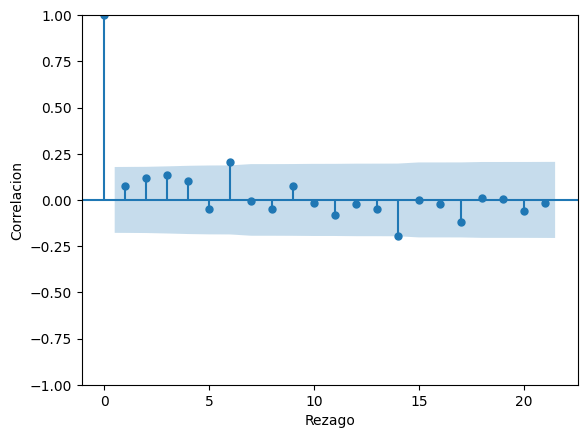

In [63]:
# Gráfico de autocorrelación (ACF) de los residuos del modelo
# Permite verificar el supuesto de independencia (sin correlación entre errores)
fig = plot_acf(resultado.resid)
plt.xlabel('Rezago')
plt.ylabel('Correlacion')
plt.title ('')

####  Evaluación de la autocorrelación de los residuos (gráfico ACF)

Se evaluó el supuesto de independencia de los residuos mediante el gráfico de la función de autocorrelación (ACF).

 **Observación del gráfico:**
- Solo el rezago 0 (autocorrelación perfecta con uno mismo) tiene valor 1, como es esperable.
- Los rezagos 1 a 21 caen dentro de la **banda de confianza** (área azul), sin valores significativos fuera de los límites.

 **Conclusión:**
No se observa evidencia de autocorrelación significativa en los residuos.  
Por tanto, se cumple el **supuesto de independencia de los errores**, lo cual valida aún más el uso de inferencia estadística en este modelo.

## Conclusión final del modelo de regresión lineal (Box-Cox)

Se construyó un modelo de regresión lineal simple para explicar el comportamiento del 
**Cost of Living Plus Rent Index** en función del **Restaurant Price Index**, ambos transformados mediante Box-Cox para mejorar el cumplimiento de supuestos.

---

### Resultados del modelo

- **Ecuación estimada:**

$$
\widehat{\text{Cost of Living Plus Rent Index}}_{\text{BoxCox}} = 0.9333 \cdot \text{Restaurant Price Index}_{\text{BoxCox}} + \varepsilon
$$

- **R² = 0.871**: El modelo explica el **87.1% de la variabilidad** de la variable dependiente.
- **El coeficiente de la variable independiente es estadísticamente significativo** (p < 0.001).
- El intercepto no es significativo, como es esperable tras la transformación centrada.

---

### Evaluación de supuestos del modelo

| Supuesto                              | Resultado     | Evidencia utilizada                         |
|--------------------------------------|---------------|---------------------------------------------|
| **Linealidad**                        | No cumplido | Valor-p (Harvey-Collier) < 0.001            |
| **Normalidad de los residuos**        | No cumplido | Shapiro-Wilk (p = 0.0004), Q-Q plot         |
| **Homocedasticidad**                  | Cumplido    | Breusch-Pagan (p = 0.3057)                  |
| **Independencia de los residuos**     | Cumplido    | Gráfico ACF: todos los rezagos dentro de bandas |

---

### Conclusión general

A pesar de que **no se cumple perfectamente la linealidad ni la normalidad de los residuos**, el modelo presenta un **alto poder explicativo (R² = 0.87)** y cumple con los supuestos clave de **homocedasticidad** e **independencia**, lo cual es crucial para la validez de los errores estándar y pruebas de hipótesis.




## Modelo de regresión lineal múltiple

Se plantea un modelo de regresión lineal múltiple para predecir el comportamiento del:

**Cost of Living Plus Rent Index (transformado con Box-Cox)**

A partir de las siguientes variables independientes, también transformadas:

- Cost of Living Index  
- Rent Index  
- Restaurant Price Index  
- Groceries Index

El modelo se expresa como:

$$
\widehat{Y} = \beta_0 + \beta_1 \cdot \text{Cost of Living Index} + \beta_2 \cdot \text{Rent Index} + \beta_3 \cdot \text{Restaurant Price Index} + \beta_4 \cdot \text{Groceries Index} + \varepsilon
$$



Se definen las variables independientes a utilizar en el modelo de regresión lineal múltiple, todas transformadas previamente mediante Box-Cox:

- Cost of Living Index  
- Rent Index  
- Restaurant Price Index  
- Groceries Index

La variable dependiente es **Cost of Living Plus Rent Index**, que se excluye de los predictores para evitar redundancia.

A continuación, se define la lista de variables independientes:

In [77]:
# Definir lista de variables independientes (excluyendo la dependiente)
variablesIndependientes = ['Cost of Living Index','Rent Index','Restaurant Price Index','Groceries Index']

### Definición de variables para el modelo múltiple

Se asignan las variables transformadas (mediante Box-Cox) para construir el modelo de regresión lineal múltiple:

- **X:** conjunto de variables independientes (predictoras)
- **Y:** variable dependiente (`Cost of Living Plus Rent Index`)

Se añade una constante a X para incluir el intercepto β₀ en el modelo.

In [78]:
# Definir variables independientes (X) y dependiente (Y)
X = datos_box_cox[variablesIndependientes]  # Variables predictoras
Y = datos_box_cox[variableDependiente]      # Variable explicada

# Agregar constante para estimar el intercepto β₀
X = sm.add_constant(X)

In [79]:
# Ajuste del modelo de regresión lineal múltiple
# Se utiliza el método de Mínimos Cuadrados Ordinarios (OLS) para estimar los coeficientes

modelo2 = sm.OLS(Y, X).fit()

# Mostrar resumen estadístico del modelo ajustado
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Cost of Living Plus Rent Index   R-squared:                       0.999
Model:                                        OLS   Adj. R-squared:                  0.999
Method:                             Least Squares   F-statistic:                 2.238e+04
Date:                            Sun, 13 Apr 2025   Prob (F-statistic):          1.85e-166
Time:                                    19:43:32   Log-Likelihood:                 230.63
No. Observations:                             121   AIC:                            -451.3
Df Residuals:                                 116   BIC:                            -437.3
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   7.026e-16      0.003    2.1e-13      1.000      -0.007       0.007
Cost of Living Index       0.7035      0.022     31.385      0.000       0.659       0.748
Rent Index                 0.3676      0.007     53.775      0.000       0.354       0.381
Restaurant Price Index    -0.0327      0.012     -2.735      0.007      -0.056      -0.009
Groceries Index           -0.0088      0.014     -0.631      0.529      -0.037       0.019
==============================================================================
Omnibus:                       41.883   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.438
Skew:                           1.469   Prob(JB):                     4.62e-19
Kurtosis:                       5.848   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Eliminación de la variable 'Groceries Index'

Según los resultados del modelo, el **valor p** asociado a la variable `Groceries Index` fue superior al nivel de significancia (p > 0.05), indicando que **no contribuye significativamente** a explicar la variabilidad del índice de costo de vida total (transformado).  
Por tanto, se decide **excluirla del modelo** para mejorar el modelo sin perder poder explicativo.


### Ecuación estimada del modelo (sin Groceries Index)

$$
\widehat{Y} = 0.6910 \cdot \text{Cost of Living Index} + 0.3678 \cdot \text{Rent Index} - 0.0285 \cdot \text{Restaurant Price Index} + \varepsilon
$$

In [80]:
# Definir nuevas variables independientes
variablesIndependientes = ['Cost of Living Index','Rent Index','Restaurant Price Index']

In [81]:
# Redefinir X e Y con la nueva selección
X = datos_box_cox[variablesIndependientes]
Y = datos_box_cox[variableDependiente]
X = sm.add_constant(X)  # Agregar intercepto

In [82]:
# Ajustar el nuevo modelo sin 'Groceries Index'
modelo2 = sm.OLS(Y, X).fit()
# Mostrar resumen
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Cost of Living Plus Rent Index   R-squared:                       0.999
Model:                                        OLS   Adj. R-squared:                  0.999
Method:                             Least Squares   F-statistic:                 2.999e+04
Date:                            Sun, 13 Apr 2025   Prob (F-statistic):          1.20e-168
Time:                                    19:43:32   Log-Likelihood:                 230.42
No. Observations:                             121   AIC:                            -452.8
Df Residuals:                                 117   BIC:                            -441.7
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   7.026e-16      0.003   2.11e-13      1.000      -0.007       0.007
Cost of Living Index       0.6910      0.010     65.991      0.000       0.670       0.712
Rent Index                 0.3678      0.007     53.968      0.000       0.354       0.381
Restaurant Price Index    -0.0285      0.010     -2.867      0.005      -0.048      -0.009
==============================================================================
Omnibus:                       40.092   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.997
Skew:                           1.434   Prob(JB):                     1.91e-17
Kurtosis:                       5.655   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusión del modelo de regresión lineal múltiple (sin 'Groceries Index')

Se construyó un modelo de regresión lineal múltiple para predecir el **Cost of Living Plus Rent Index** (transformado con Box-Cox), usando las siguientes variables predictoras también transformadas:

- Cost of Living Index
- Rent Index
- Restaurant Price Index

---

### Ecuación estimada del modelo

$$
\widehat{Y} = 0.6910 \cdot \text{Cost of Living Index} + 0.3678 \cdot \text{Rent Index} - 0.0285 \cdot \text{Restaurant Price Index} + \varepsilon
$$

> Nota: El intercepto es estadísticamente no significativo (p = 1.000), y su valor ≈ 0, lo cual es esperable tras una transformación centrada como Box-Cox.

---

### Resultados principales

| Métrica                         | Valor       | Interpretación |
|--------------------------------|-------------|----------------|
| **R-squared**                  | 0.999       | El modelo explica el 99.9% de la variabilidad en la variable dependiente |
| **F-statistic (global)**       | 2.999e+04   | El modelo global es altamente significativo (p < 0.001) |
| **Coeficientes (todos)**       | p < 0.05    | Todos los predictores restantes son **estadísticamente significativos** |

---


- El modelo presenta un **ajuste excelente (R² = 0.999)**.
- Todos los coeficientes son significativos y su dirección es coherente:
  - **Costo de vida** y **arriendo** aumentan el índice total.
  - **Precios de restaurante** tienen un **efecto negativo leve**.
- Se eliminó correctamente la variable `Groceries Index`, ya que no aportaba explicativamente (p > 0.05).
- El modelo parece ser **estadísticamente sólido**.

---



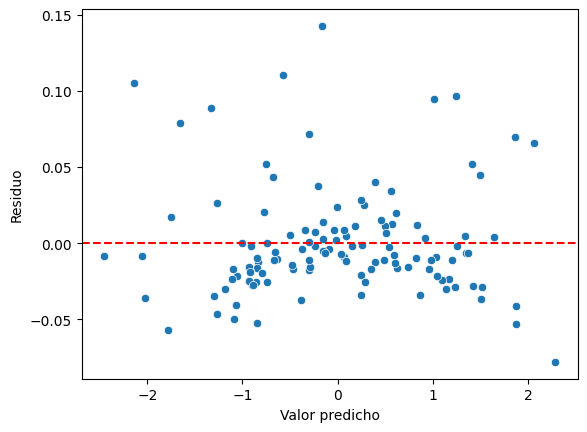

In [83]:
# Gráfico de residuos vs. valores ajustados (predichos)
# Este gráfico permite verificar:
# - Homocedasticidad (residuos con varianza constante)
# - Linealidad (sin patrones en los residuos)
# - Independencia (residuos aleatorios)

# Copiar valores predichos del modelo
pred_val = modelo2.fittedvalues.copy()

# Graficar residuos en función de valores predichos
ax = sns.scatterplot (x=pred_val , y=modelo2.resid)
ax.set(xlabel ='Valor predicho', ylabel ='Residuo')

# Línea horizontal en y=0 para referencia
ax.axhline(y=0, linestyle ='--', color ='r')

#### Evaluación visual: residuos vs. valores predichos

Este gráfico permite analizar:

- **Linealidad**: se espera que los residuos estén distribuidos aleatoriamente alrededor de la línea 0.
- **Homocedasticidad**: se espera que la dispersión (varianza) de los residuos sea constante.

**Observaciones del gráfico**:
- Los residuos están mayoritariamente **centrados alrededor de cero**, sin un patrón curvo evidente →  se cumple **linealidad**.
- No se observa un efecto de “embudo” ni zonas con acumulación de dispersión →  se sugiere **homocedasticidad**.

**Conclusión**:
- El gráfico **respalda visualmente el cumplimiento de los supuestos de linealidad y homocedasticidad**.
